# Importing required libraries

In [160]:
import numpy as np
import pandas as pd
from sklearn import *
from datetime import datetime
from sklearn.svm import SVC
import seaborn as sns

# Reading the dataset

In [161]:
training_data = np.genfromtxt('physdata.csv', delimiter=',', dtype=np.int32)

In [162]:
df = pd.DataFrame(data = training_data) 

In [163]:
df.shape

(11040, 31)

In [164]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
dtype: int64

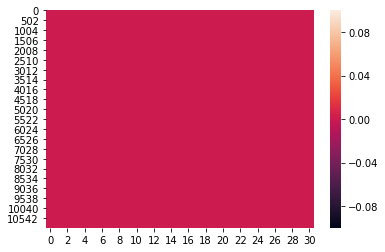

In [165]:
sns.heatmap(df.isnull())

# Spliting the data into input and output

In [166]:
svclassifier = SVC(kernel='linear')
inputs = training_data[:,:-1]
outputs = training_data[:, -1]

In [167]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(inputs,outputs,test_size=0.30,random_state=2)

In [168]:
svclassifier.fit(X_train,y_train)

SVC(kernel='linear')

In [169]:
y_train_pred = svclassifier.predict(X_train)
y_train_pred

array([ 1,  1,  1, ...,  1, -1, -1])

In [170]:
from sklearn.metrics import accuracy_score
svm_accuracy=accuracy_score(y_train,y_train_pred)
print(svm_accuracy)

0.9276656314699793


# Appling svm algorithm on sample test data

In [171]:
testSet = [[1,1,1,1,-1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,1,-1,-1,1,-1,1,-1,1,-1,-1,1,1,1,-1,-1]]
test = pd.DataFrame(testSet)
t1 = datetime.now()
svclassifier.fit(inputs,outputs)
predictions = svclassifier.predict(test)
t2 = datetime.now()
delta = t2-t1

# Prediction on sample test data
- The result -1 indicates 'No Citation' in research papers and 1 indicates 'Citation'.

In [172]:
print('Time taken by SVM on Environment dataset is:',delta)
print('SVM Prediction on the first test set is:',predictions)


Time taken by SVM on Environment dataset is: 0:00:07.570914
SVM Prediction on the first test set is: [-1]


# Prediction on sample test data

In [173]:
testSet2 = [[1,1,1,1,1,-1,-1,1,-1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,-1,1,1,1,0,1]]
test = pd.DataFrame(testSet2)
predictions = svclassifier.predict(test)
print('SVM Prediction on the second test set is:',predictions)


SVM Prediction on the second test set is: [1]


# KNN Classification
- x' = (x-mean)/standard deviation

In [174]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train))#it returns array we convert it to dataframe
scaled_X_train#fit-find out parameters(caluculated mean and variance) and transform(applies to every value)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.715565,-0.474890,0.384421,0.420681,0.377964,-0.390165,1.150091,0.818575,-0.704226,-2.104036,...,0.212536,-2.051231,0.316835,-1.04745,0.674606,0.853121,1.699213,0.397618,-0.604585,0.403491
1,0.715565,-0.474890,0.384421,0.420681,0.377964,-0.390165,1.150091,0.818575,-0.704226,0.475277,...,0.212536,0.487512,0.316835,-1.04745,0.674606,-0.356811,1.699213,0.397618,-0.604585,0.403491
2,0.715565,-0.474890,0.384421,0.420681,0.377964,-0.390165,1.150091,0.818575,-0.704226,0.475277,...,0.212536,0.487512,0.316835,-1.04745,0.674606,0.853121,-0.588508,0.397618,-0.604585,0.403491
3,0.715565,-0.474890,0.384421,0.420681,0.377964,-0.390165,1.150091,0.818575,-0.704226,0.475277,...,0.212536,0.487512,0.316835,-1.04745,0.674606,0.853121,-0.588508,0.397618,-0.604585,0.403491
4,-1.397498,-0.474890,0.384421,0.420681,0.377964,-0.390165,-1.294664,-1.374888,-0.704226,0.475277,...,0.212536,0.487512,0.316835,0.95470,0.674606,-0.356811,-0.588508,0.397618,-0.604585,0.403491
5,-1.397498,-0.474890,0.384421,0.420681,0.377964,-0.390165,-1.294664,-1.374888,-0.704226,0.475277,...,0.212536,0.487512,0.316835,0.95470,0.674606,0.853121,-0.588508,-2.514979,-0.604585,-2.478372
6,0.715565,2.147441,0.384421,0.420681,0.377964,-0.390165,-1.294664,-1.374888,-0.704226,-2.104036,...,0.212536,-2.051231,-3.156216,-1.04745,0.674606,-1.566743,-0.588508,0.397618,-0.604585,-2.478372
7,0.715565,-0.474890,0.384421,0.420681,0.377964,-0.390165,-1.294664,0.818575,-0.704226,-2.104036,...,0.212536,-2.051231,-3.156216,0.95470,-1.482347,0.853121,-0.588508,0.397618,1.151233,-2.478372
8,-1.397498,-0.474890,0.384421,0.420681,0.377964,-0.390165,1.150091,0.818575,-0.704226,0.475277,...,0.212536,0.487512,0.316835,-1.04745,0.674606,0.853121,1.699213,0.397618,-0.604585,0.403491
9,-1.397498,-0.474890,-2.601314,0.420681,0.377964,-0.390165,-1.294664,0.818575,1.419998,0.475277,...,0.212536,0.487512,0.316835,0.95470,-1.482347,0.853121,-0.588508,0.397618,1.151233,0.403491


In [175]:
scaled_X_test = pd.DataFrame(scaler.transform(X_test))#it returns array we convert it to dataframe
scaled_X_test#transform-whatever learnt through train is applied to test

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.715565,2.147441,0.384421,0.420681,0.377964,-0.390165,-0.072286,-0.278157,-0.704226,-2.104036,...,0.212536,-2.051231,0.316835,0.95470,0.674606,-0.356811,-0.588508,0.397618,-0.604585,-2.478372
1,-1.397498,-0.474890,-2.601314,0.420681,-2.645751,-0.390165,1.150091,0.818575,-0.704226,0.475277,...,0.212536,0.487512,0.316835,-1.04745,-1.482347,0.853121,1.699213,-2.514979,1.151233,0.403491
2,0.715565,-0.474890,0.384421,-2.377100,0.377964,-0.390165,1.150091,0.818575,-0.704226,-2.104036,...,0.212536,-2.051231,0.316835,0.95470,0.674606,0.853121,-0.588508,0.397618,-0.604585,0.403491
3,0.715565,2.147441,0.384421,0.420681,0.377964,-0.390165,-0.072286,0.818575,-0.704226,0.475277,...,0.212536,0.487512,0.316835,0.95470,0.674606,0.853121,1.699213,0.397618,-0.604585,0.403491
4,0.715565,-0.474890,-2.601314,0.420681,0.377964,-0.390165,1.150091,0.818575,-0.704226,0.475277,...,0.212536,0.487512,0.316835,-1.04745,0.674606,0.853121,1.699213,0.397618,-0.604585,0.403491
5,0.715565,2.147441,0.384421,0.420681,0.377964,-0.390165,-0.072286,-0.278157,-0.704226,-2.104036,...,0.212536,-2.051231,0.316835,0.95470,-1.482347,-1.566743,-0.588508,0.397618,-0.604585,-2.478372
6,-1.397498,-0.474890,0.384421,0.420681,0.377964,-0.390165,-0.072286,-1.374888,1.419998,0.475277,...,0.212536,0.487512,0.316835,-1.04745,0.674606,0.853121,1.699213,0.397618,-0.604585,0.403491
7,-1.397498,2.147441,0.384421,0.420681,0.377964,-0.390165,1.150091,0.818575,-0.704226,-2.104036,...,0.212536,-2.051231,0.316835,0.95470,0.674606,0.853121,-0.588508,0.397618,1.151233,0.403491
8,-1.397498,-0.474890,0.384421,0.420681,0.377964,-0.390165,-0.072286,-1.374888,-0.704226,0.475277,...,0.212536,0.487512,0.316835,-1.04745,0.674606,-0.356811,-0.588508,0.397618,-0.604585,0.403491
9,-1.397498,-0.474890,0.384421,-2.377100,0.377964,-0.390165,1.150091,0.818575,-0.704226,-2.104036,...,0.212536,-2.051231,-3.156216,0.95470,0.674606,-0.356811,-0.588508,0.397618,1.151233,0.403491


In [176]:
# Model Building
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6, metric="euclidean")
# Apply knn on dataset
# obj.fit(input,output)
knn.fit(scaled_X_train,y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [177]:
# predticion on the data
#predtict()-gives the predicted values
y_train_pred=knn.predict(scaled_X_train)
y_train_pred

array([ 1,  1,  1, ...,  1, -1, -1])

# Prediction on sample test data
- The result -1 indicates 'No Citation' in research papers and 1 indicates 'Citation'.

In [181]:
testSet = [[1,0,-1,1,1,-1,0,1,-1,1,1,1,1,0,0,-1,-1,-1,0,-1,1,-1,1,-1,1,1,-1,1,-1,-1]]
test = pd.DataFrame(testSet)

t1 = datetime.now()
result1=knn.predict(test)
t2 = datetime.now()
delta = t2-t1
print('Time taken by knn Euclid on Citations dataset is:',delta)
print('knn Prediction on the first test set is:',result1)

testSet2 = [[1,-1,1,1,1,-1,-1,0,1,1,-1,1,1,0,-1,-1,-1,-1,0,1,1,1,1,-1,1,1,-1,1,1,-1]]
test = pd.DataFrame(testSet2)
result2=knn.predict(test)
print('knn Prediction on the second test set is:',result2)
#Note: The result -1 indicates 'No Citation' in research papers. 1 indicates 'Citation'.

Time taken by knn Euclid on Citations dataset is: 0:00:00.009002
knn Prediction on the first test set is: [1]
knn Prediction on the second test set is: [-1]


In [178]:
from sklearn.metrics import accuracy_score
# Elbow method-for finding feasible value of k
#build model with mutiple k values
# sqrt(n)-range
scores = []
for k in range(1,25):
    knn_model = KNeighborsClassifier(n_neighbors=k,metric="euclidean")
    knn_model.fit(scaled_X_train,y_train)
    pred_test=knn_model.predict(scaled_X_test)
    scores.append(accuracy_score(y_test,pred_test))
print(scores)
knn_accuracy=max(scores)


[0.9622584541062802, 0.946256038647343, 0.9525966183574879, 0.9444444444444444, 0.9441425120772947, 0.936292270531401, 0.9423309178743962, 0.9356884057971014, 0.938707729468599, 0.9344806763285024, 0.9396135265700483, 0.9344806763285024, 0.9359903381642513, 0.9290458937198067, 0.9347826086956522, 0.9335748792270532, 0.9314613526570048, 0.9299516908212561, 0.9308574879227053, 0.9290458937198067, 0.9296497584541062, 0.928743961352657, 0.9302536231884058, 0.928743961352657]


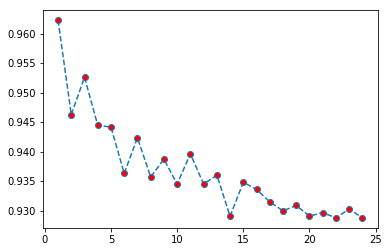

In [182]:
plt.plot(range(1,25),scores,marker='o',markerfacecolor='r',linestyle='--')

In [179]:
print("For k = {} accuracy is {}".format(scores.index(t)+1,max(scores)))

For k = 1 accuracy is 0.9622584541062802


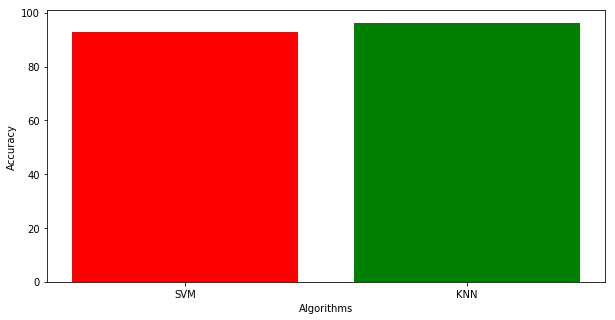

In [180]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,5))
algo=['SVM','KNN']
acc=[]
acc.append(svm_accuracy*100)
acc.append(knn_accuracy*100)
plt.bar(algo,acc,color=['red','green'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.show()